In [22]:
import pickle
import logging
import numpy as np
from cml_data_tools.experiment import _build_std_matrix
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
with open('/hd1/stilljm/cml_tests/D_05/meta.pkl', 'rb') as file:
    meta = pickle.load(file)

In [3]:
with open('/hd1/stilljm/cml_tests/D_05/standardizer.pkl', 'rb') as file:
    std = pickle.load(file)

In [4]:
def stream(file):
    while True:
        try:
            df = pickle.load(file)
        except EOFError:
            break
        else:
            yield df

In [5]:
with open('/hd1/stilljm/cml_tests/D_05/segment_000/model.pkl', 'rb') as file:
    model = pickle.load(file)

/home/laskota/.conda/envs/ml39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator FastICA from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
# with open('/hd1/stilljm/cml_tests/D_05/segment_000/curve_xs.pkl', 'rb') as file:
#     # this step takes a while, might save the results
#     mat0 = _build_std_matrix(meta, stream(file), std)

In [11]:
#  with open('/hd1/tom/tmp/segment_000/std_xs.pkl', 'wb') as f:
#             pickle.dump(mat0, f, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
# with open('/hd1/stilljm/cml_tests/D_05/segment_001/curve_xs.pkl', 'rb') as file:
#     # this step takes a while, might save the results
#     mat1 = _build_std_matrix(meta, stream(file), std)

In [13]:
# with open('/hd1/tom/tmp/segment_001/std_xs.pkl', 'wb') as f:
#             pickle.dump(mat1, f, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
with open('/hd1/tom/tmp/segment_000/std_xs.pkl', 'rb') as file:
    mat0, std0 = pickle.load(file)

In [7]:
with open('/hd1/tom/tmp/segment_001/std_xs.pkl', 'rb') as file:
    mat1, std1 = pickle.load(file)

In [8]:
# expr0 = model.transform(std0)

In [9]:
# with open('/hd1/tom/tmp/segment_000/expr0.pkl', 'wb') as file:
#     pickle.dump(expr0, file, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# expr1 = model.transform(std1)
# with open('/hd1/tom/tmp/segment_000/expr1.pkl', 'wb') as file:
#     pickle.dump(expr1, file, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
with open('/hd1/stilljm/cml_tests/D_05/segment_001/model.pkl', 'rb') as file:
    model1 = pickle.load(file)
expr0 = model1.transform(std0)
expr1 = model1.transform(std1)
# with open('/hd1/tom/tmp/segment_001/expr0.pkl', 'wb') as file:
#     pickle.dump(expr0, file, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/hd1/tom/tmp/segment_001/expr1.pkl', 'wb') as file:
#     pickle.dump(expr1, file, protocol=pickle.HIGHEST_PROTOCOL)
   

/home/laskota/.conda/envs/ml39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator FastICA from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


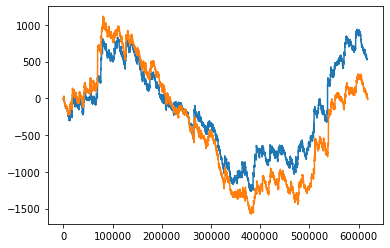

In [71]:
# These should be highly correlated because they're 
# samples from the same patients in the same order. 
# But they shouldn't be identical.
plt.plot(np.cumsum(expr0['ICA-107']).to_numpy())
plt.plot(np.cumsum(expr1['ICA-107']).to_numpy())


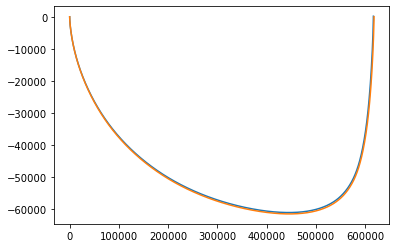

In [53]:
# These should be very close. 
# Better than looking at the histogram, because of the large dynamic range of the data
plt.plot(np.cumsum(np.sort(expr0['ICA-106'])))
plt.plot(np.cumsum(np.sort(expr1['ICA-106'])))


(array([1.61695343e-06, 1.61695343e-06, 1.61695343e-06, 1.61695343e-06,
        1.61695343e-06, 3.23390687e-06, 4.85086030e-06, 4.85086030e-06,
        4.85086030e-06, 4.85086030e-06, 4.85086030e-06, 4.85086030e-06,
        6.46781373e-06, 1.13186740e-05, 2.10203946e-05, 3.39560221e-05,
        5.49764167e-05, 8.24646251e-05, 1.08335880e-04, 1.76247924e-04,
        3.28241547e-04, 6.87205209e-04, 3.16437787e-03, 9.47657600e-01,
        9.95755497e-01, 9.98148588e-01, 9.98855197e-01, 9.99217395e-01,
        9.99427598e-01, 9.99600613e-01, 9.99715416e-01, 9.99794647e-01,
        9.99844772e-01, 9.99883579e-01, 9.99909451e-01, 9.99917535e-01,
        9.99928854e-01, 9.99932088e-01, 9.99941790e-01, 9.99949874e-01,
        9.99961193e-01, 9.99967661e-01, 9.99974129e-01, 9.99977363e-01,
        9.99978980e-01, 9.99980597e-01, 9.99982214e-01, 9.99985447e-01,
        9.99987064e-01, 9.99988681e-01, 9.99988681e-01, 9.99988681e-01,
        9.99990298e-01, 9.99990298e-01, 9.99991915e-01, 9.999935

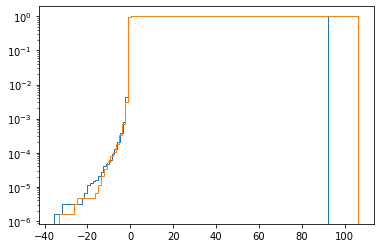

In [72]:
plt.hist(expr0['ICA-006'], density=True, cumulative=True, bins=100, histtype='step', log='y')
plt.hist(expr1['ICA-006'], density=True, cumulative=True, bins=100, histtype='step', log='y')

In [73]:
# Even with the extremely large numbers, the p value shows no significant difference. 
# The statistic is very small.

ks_2samp(expr0['ICA-006'], expr1['ICA-006'])

KstestResult(statistic=0.0015087552409712435, pvalue=0.4824311204069285)

In [28]:
names = expr0.columns
stats = []
ps = []
for i, col in enumerate(names):
    if i % 100 == 0:
        print(f'Testing {col}')
    stat, pval = ks_2samp(expr0[col], expr1[col])
    stats.append(stat)
    ps.append(pval)


Testing ICA-000
Testing ICA-100
Testing ICA-200
Testing ICA-300
Testing ICA-400


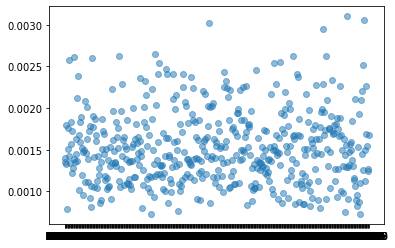

In [30]:
plt.plot(names, stats, 'o', alpha=0.5)
# plt.plot(names, ps, 'o', alpha=0.5)

In [82]:
model

IcaPhenotypeModel()

In [78]:
import inspect

In [83]:
print(inspect.getsource(model.transform))

    def transform(self, X):
        """Project the data in X onto the previously-learned phenotypes.

        Arguments
        ---------
        X : pandas.DataFrame
            Has one row per instance, one column per variable

        Returns
        -------
        pandas.DataFrame
            A pandas dataframe with rows corresponding to (and indexed the same
            as) rows in X, and columns corresponding to learned phenotypes.
            Each cell contains the amount of the given phenotype expressed by
            the row of X.
        """

        raw_expressions = pd.DataFrame(self.ica.transform(X.values),
                                       index=X.index,
                                       columns=self.phenotype_names)

        scaled_expressions = self._scale_expressions(raw_expressions)
        return scaled_expressions

